<h1>Деревья решений и метод ближайших соседей в задаче распознавания рукописных цифр MNIST</h1>
¶
Теперь посмотрим на описанные 2 алгоритма в реальной задаче. Используемый "встроенные" в sklearn данные по рукописным цифрам. Эта задача будет примером, когда метод ближайших соседей работает на удивление хорошо.

In [46]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

In [2]:
digits = load_digits()

In [18]:
X = digits['data']
y = digits['target']

In [19]:
digits['images'][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

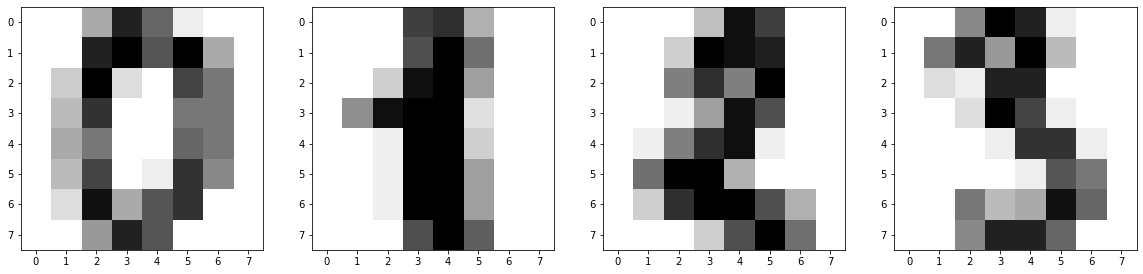

In [20]:
n = 4
cols = 4
rows =1
fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*5))
row_i = 0
for i in range(n):
    axes[i % cols].imshow(digits['images'][i], cmap=plt.cm.binary)


In [21]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3,
                                                          random_state=17)

In [28]:
tree = DecisionTreeClassifier(max_depth=5, random_state=17)
knn = KNeighborsClassifier(n_neighbors=10)

In [30]:
%%time
tree.fit(X_train, y_train)

Wall time: 13 ms


DecisionTreeClassifier(max_depth=5, random_state=17)

In [31]:
%%time
knn.fit(X_train, y_train)

Wall time: 1.07 ms


KNeighborsClassifier(n_neighbors=10)

Сделаем прогнозы для отложенной выборки. Видим, что метод ближайших соседей справился намного лучше. Но это мы пока выбирали параметры наугад.

In [37]:
tree_pred = tree.predict(X_holdout)
knn_pred = knn.predict(X_holdout)
accuracy_score(y_holdout, knn_pred), accuracy_score(y_holdout, tree_pred)

(0.9740740740740741, 0.6666666666666666)

In [38]:
tree_params = {'max_depth': [1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 64],
               'max_features': [1, 2, 3, 5, 10, 20, 30, 40, 50, 64]}


In [39]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [40]:
tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1, verbose=True)

In [41]:
tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 110 candidates, totalling 550 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=5, random_state=17),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 64],
                         'max_features': [1, 2, 3, 5, 10, 20, 30, 40, 50, 64]},
             verbose=True)

Лучшее сочетание параметров и соответствующая средняя доля правильных ответов на кросс-валидации:

In [43]:
tree_grid.best_params_, tree_grid.best_score_

({'max_depth': 10, 'max_features': 50}, 0.8568203376968316)

In [44]:
accuracy_score(y_holdout, tree_grid.predict(X_holdout))

0.8425925925925926

In [45]:
cross_val_score(KNeighborsClassifier(n_neighbors=1), X_train, y_train, cv=5)

array([0.97222222, 0.98809524, 0.99203187, 0.99203187, 0.98804781])

In [47]:
np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=1), X_train, y_train, cv=5))

0.9864858028204642

In [48]:
knn = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
accuracy_score(y_holdout, knn.predict(X_holdout))

0.9833333333333333

<h1>Вывод по этому эксперименту (и общий совет):
    
в начале проверяйте на своих данных простые модели – дерево решений и метод ближайших соседей (а в следующий раз сюда добавится логистическая регрессия), может оказаться, что уже они работают достаточно хорошо.